# Análisis de cálidad del dataset
### Ética en la Ciencia de Datos

Sergio Daniel Dueñas Godinez


<div>
<p style = 'text-align:left;'>
<img src="https://i0.wp.com/cimtrajalisco.org/wp-content/uploads/2019/02/Logo_Horizontal-1024x472.jpg?fit=1024%2C472" alt="JuveYell" width="300px">
</p>
</div>

#### Bank Loan Approval

Datos recopilados de:
https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc

#### Descripción de columnas:





- ID : ID del cliente.

- Age : Edad en años.

- Experience : Experiencia de trabajo en años.

- Income : Ingreso anual expresado en miles.

- Zipcode : Zipcode de la vivienda del cliente.

- Family : Número de miembros en la familia.

- CCAvg : Promedio del gasto en su tarjeta de credito al mes expresado en miles.

- Education : Nivel de educación

        1 : Titulo de grado

        2 : Título de maestría
        
        3 : Titulos profesionales avanzados (Phd, MD, etc)

- Mortgage: Valor de la hipoteca de su casa en miles.

- Securities Account : Si iene el cliente una cuenta de valores en el banco como acciones

- CD Account : Si tiene el cliente un certificado de cuenta de depósito (CD) en el banco

- Online : Si el cliente usa las páginas del banco en línea

- CreditCard : Usa una tarjeta de crédito emitida por el banco

- Personal Loan : El CLiente aceptó un prestamo personal en la campaña pasada



In [1]:
# Librerias a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pyzipcode import ZipCodeDatabase
zcdb = ZipCodeDatabase()

import warnings
warnings.filterwarnings("ignore")


/var/folders/vj/xp36g_9s7lj2v05vvcsms4500000gn/T/ipykernel_17042/4073944537.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("../data/bankloan.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
df.duplicated().sum()

0

<Axes: >

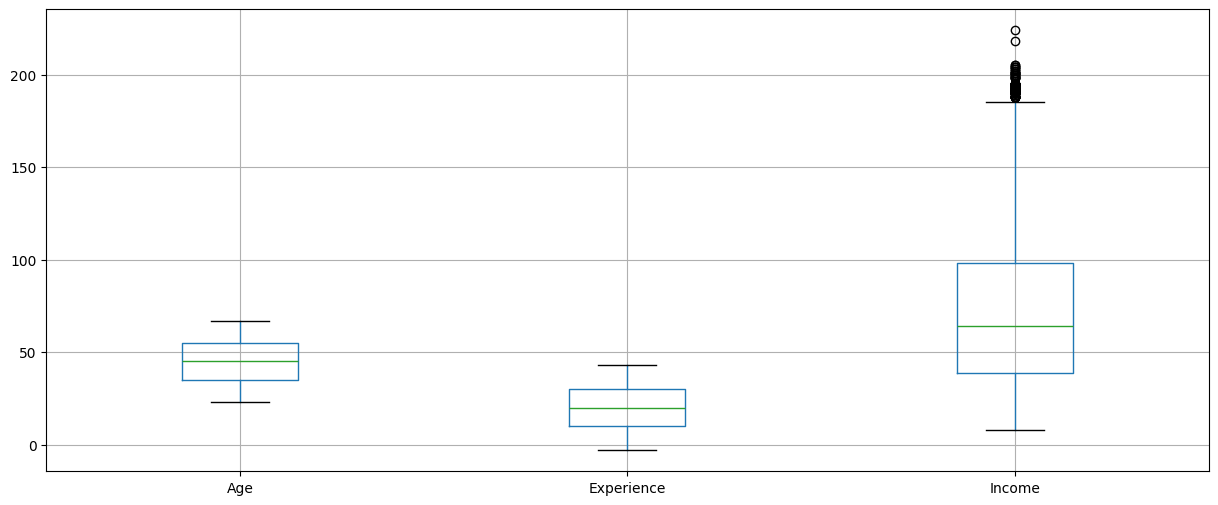

In [7]:
df[["Age", "Experience", "Income"]].boxplot(figsize=(15,6))

Hay gente que tiene una experiencia negativa, esto lo tomaré como error a la hora de capturar los datos por lo que les haré valor absoluto y tengan la experiencia  positiva.

In [8]:
df['Experience'] = abs(df['Experience'])

### Aunque al final no lo vaya a usar, me dió curiosidad ver de donde son esos códigos postales

In [9]:
zipCodeState = []
zipCodeCity = []

for i in df["ZIP.Code"]:
    try:
        zipcode = zcdb[i]
        zipCodeState.append(zipcode.state)
        zipCodeCity.append(zipcode.city)
    except KeyError:
        zipCodeState.append("notFound")
        zipCodeCity.append("notFound")

df["zipCodeCity"] = zipCodeCity
df["zipCodeState"] = zipCodeState


In [10]:
df.zipCodeState.unique()

array(['CA', 'notFound'], dtype=object)

In [11]:
len(df.zipCodeCity.unique())

243

### Todos son de california

In [12]:
df["zipCodeCity"].value_counts()[:15]

zipCodeCity
Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
Palo Alto        130
Stanford         127
Davis            121
La Jolla         112
Santa Barbara    103
San Jose          96
Santa Clara       77
Monterey          72
Pasadena          71
Irvine            58
Name: count, dtype: int64

cerca del 45% de las personas se representan en tan solo 15 ciudades de las 243 que hay.

La mayoría de las ciudades tienen los valores muy parecidos, por lo que creí poco necesario hacer un análisis por ciudad

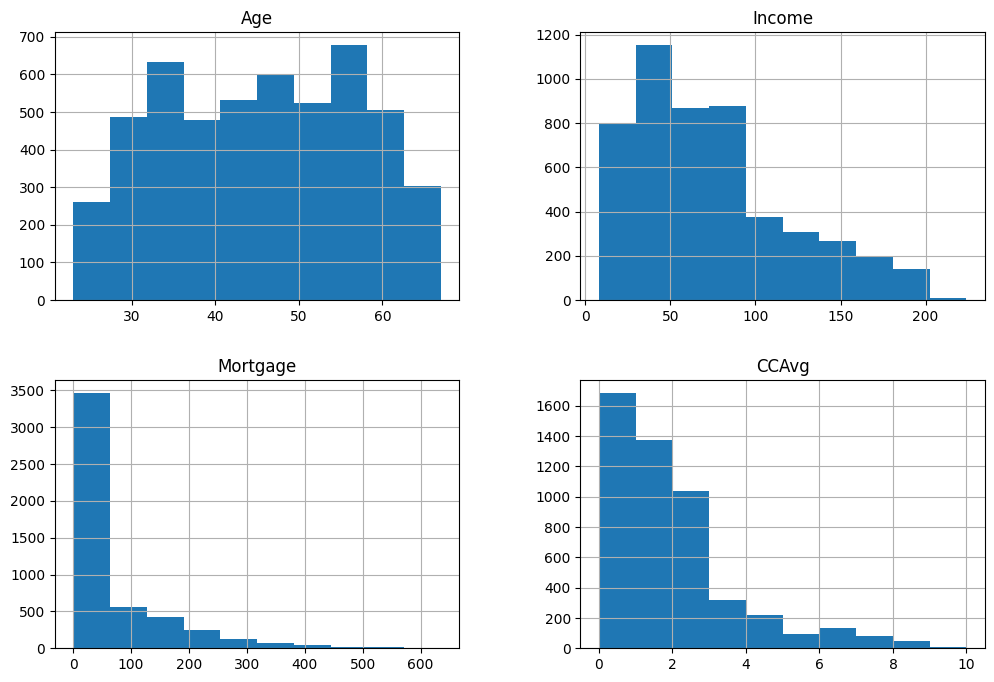

In [13]:
# Genera un histograma para cada columna numérica
df[["Age","Income", "Mortgage", "CCAvg"]].hist(figsize=(12, 8))
plt.show()


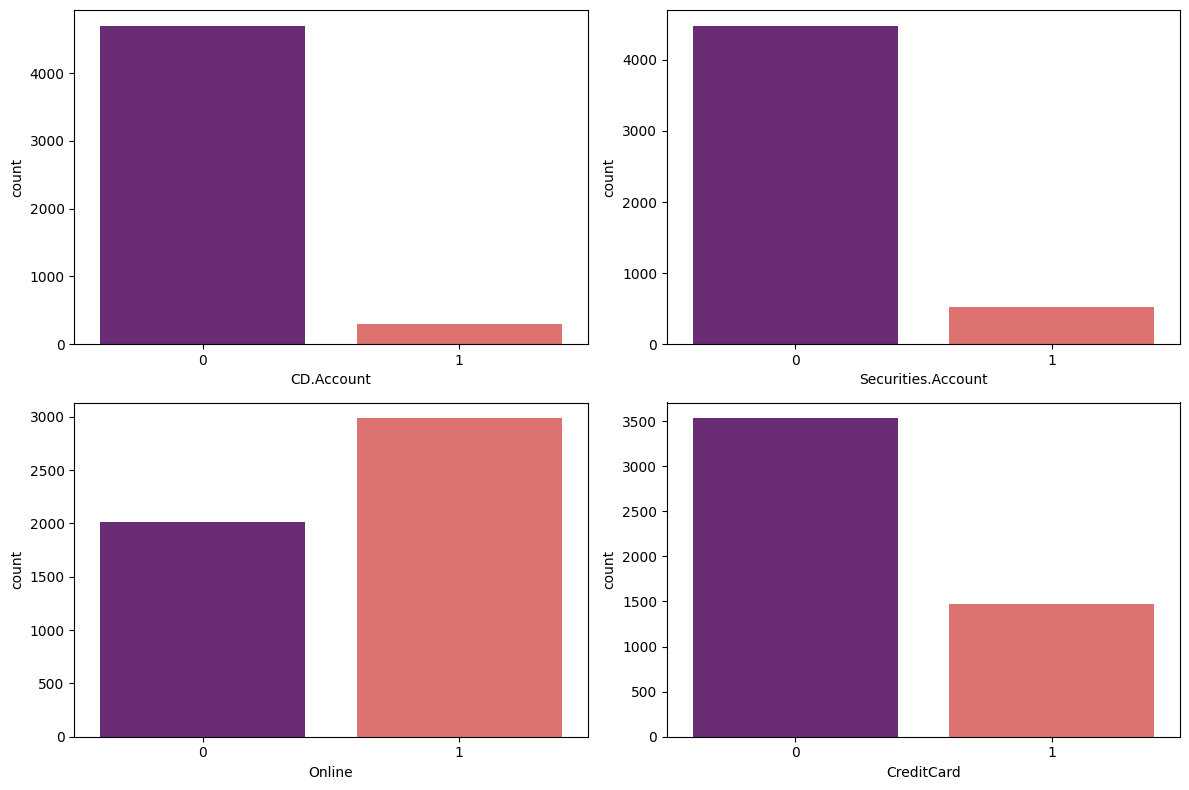

In [14]:
boolean_columns = [ 'CD.Account', 'Securities.Account', 'Online', 'CreditCard']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.countplot(x='CD.Account', data=df, ax=axes[0,0], palette='magma')
sns.countplot(x='Securities.Account', data=df, ax=axes[0,1], palette='magma')
sns.countplot(x='Online', data=df, ax=axes[1,0], palette='magma')
sns.countplot(x='CreditCard', data=df, ax=axes[1,1], palette='magma')

plt.tight_layout()
plt.show()

Ahora un mapa de correlación con nuestra variable a predecir

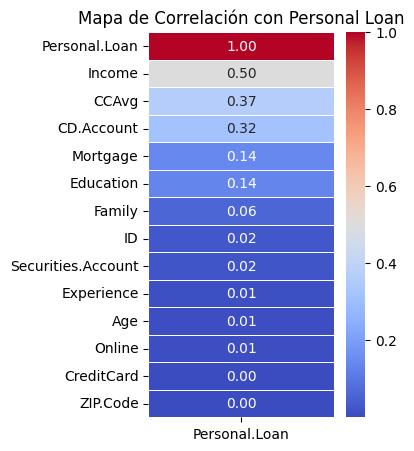

In [15]:
# Correlación entre variables
numeric_columns = df.select_dtypes(include=['number'])
correlation = abs(numeric_columns.corr()[['Personal.Loan']]).sort_values(by='Personal.Loan', ascending=False)

plt.figure(figsize=(3, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Correlación con Personal Loan')
plt.show()

#### Conclusión de los datos

La variable de edad es la que está mejor distribuida, en cuanto a la variable del income igual que en el promedio de lo que gastan mensual vimos que está sesgada hacia la derecha por lo que quizá debería hacerle una transformación pero aún no sé, y en esa misma variable de income, vi que había muchos outliers algo normal que mucha gente gana más que el promedio

En cuanto a las variables booleanas , se observa la gran mayoría no tienen cuentas de debito en el banco, ni cuentas de acciones, además que muchas personas usan más el banco en línea que el banco tradicional físico.

con respecto a cada ciudad, me percaté que tenían masomenos als mismas distribuciones por lo que no me metí a investigarlas individualmente tan exhaustivo.